In [17]:
pip install librosa 

Note: you may need to restart the kernel to use updated packages.


In [18]:
#numpy matplotlib scipy noisereduce tensorflow

In [19]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Charger le fichier MP3
audio_path = "C:/Users/nsidimou/Downloads/mon_projet_perso/audio.mp3"

signal, sr = librosa.load(audio_path, sr=None)



In [20]:
print(signal)
print(sr)

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -2.2928818e-04
 -1.5211682e-04 -2.9761111e-06]
44100


In [21]:
# Afficher les informations
print(f"Taux d'échantillonnage : {sr} Hz")
print(f"Durée : {len(signal) / sr:.2f} secondes")
print(f"Nombre d'échantillons : {len(signal)}")


Taux d'échantillonnage : 44100 Hz
Durée : 143.36 secondes
Nombre d'échantillons : 6322176


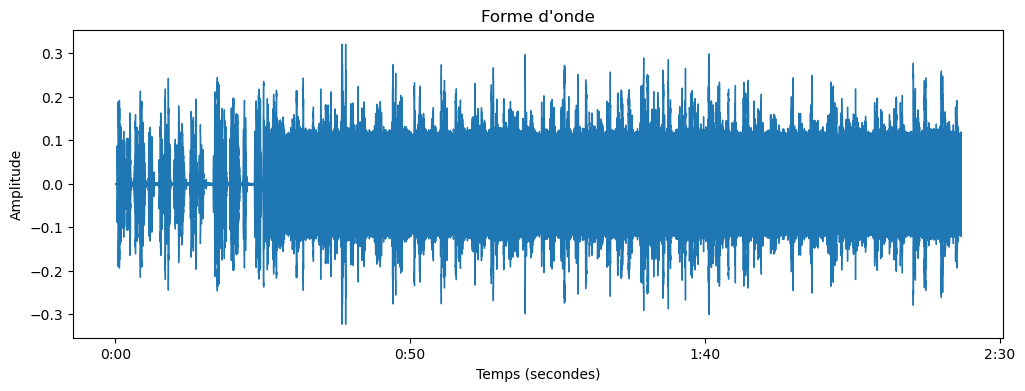

In [10]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sr)
plt.title("Forme d'onde")
plt.xlabel("Temps (secondes)")
plt.ylabel("Amplitude")
plt.show()


In [11]:
# import plotly.graph_objects as go

# # Exemple : Créer une forme d'onde interactive
# time = np.linspace(0, len(signal) / sr, len(signal))  # Calcul du temps en secondes

# fig = go.Figure()

# fig.add_trace(go.Scatter(
#     x=time,
#     y=signal,
#     mode='lines',
#     line=dict(color='royalblue'),
#     name='Forme d\'onde'
# ))

# fig.update_layout(
#     title="Forme d'onde audio",
#     xaxis_title="Temps (secondes)",
#     yaxis_title="Amplitude",
#     template="plotly_white",
#     width=1000,  # Largeur de la figure
#     height=400   # Hauteur de la figure
# )

# fig.show()


In [12]:
# import plotly.graph_objects as go

# # Exemple : Créer une forme d'onde interactive
# time = np.linspace(0, len(signal) / sr, len(signal))  # Calcul du temps en secondes

# fig = go.Figure()

# fig.add_trace(go.Scatter(
#     x=time,
#     y=signal,
#     mode='lines',
#     line=dict(color='royalblue'),
#     name='Forme d\'onde'
# ))

# fig.update_layout(
#     title="Forme d'onde audio",
#     xaxis_title="Temps (secondes)",
#     yaxis_title="Amplitude",
#     template="plotly_white",
#     width=1000,  # Largeur de la figure
#     height=400   # Hauteur de la figure
# )

# fig.show()


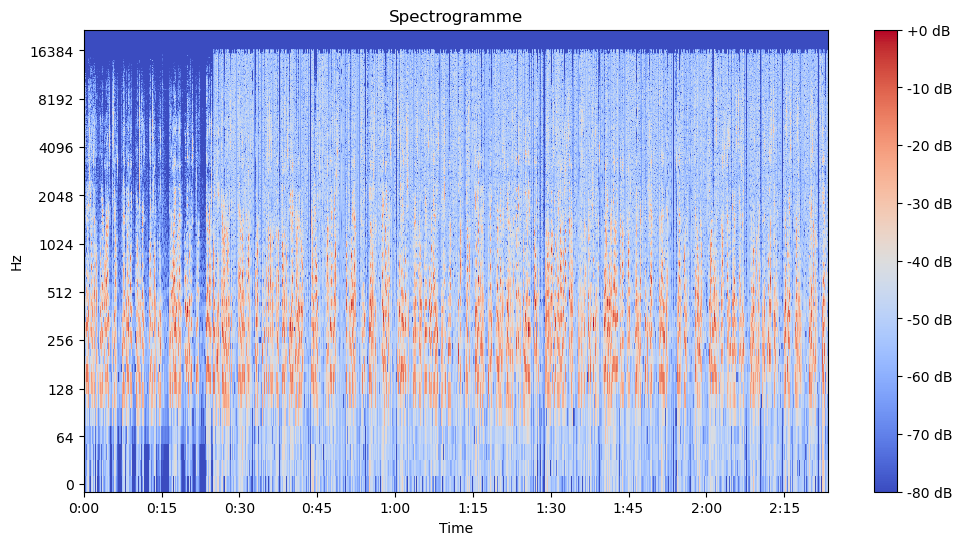

In [13]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log", cmap="coolwarm")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogramme")
plt.show()


In [14]:
pip install noisereduce


Note: you may need to restart the kernel to use updated packages.


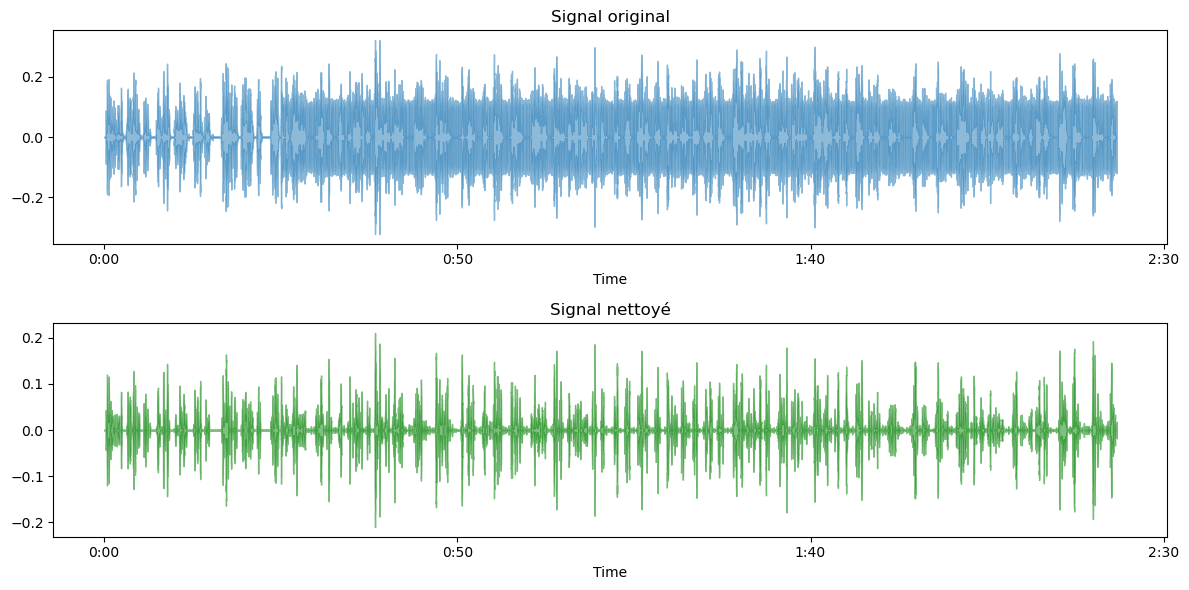

In [22]:
import noisereduce as nr

# Estimer une portion de bruit (par exemple, les premières secondes silencieuses)
noise_sample = signal[:sr]  # Première seconde d'audio (à ajuster selon votre fichier)

# Réduction de bruit
clean_signal = nr.reduce_noise(y=signal, sr=sr, y_noise=noise_sample)

# Visualisation avant/après
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
librosa.display.waveshow(signal, sr=sr, alpha=0.5)
plt.title("Signal original")
plt.subplot(2, 1, 2)
librosa.display.waveshow(clean_signal, sr=sr, alpha=0.5, color="green")
plt.title("Signal nettoyé")
plt.tight_layout()
plt.show()


In [23]:
pip install demucs


Note: you may need to restart the kernel to use updated packages.


In [24]:
import subprocess

# Commande pour exécuter Demucs
subprocess.run(["demucs", "chemin/vers/votre/audio.mp3"])

# Le fichier nettoyé sera enregistré dans le répertoire de sortie de Demucs.


CompletedProcess(args=['demucs', 'chemin/vers/votre/audio.mp3'], returncode=0)

In [25]:
import soundfile as sf

# Sauvegarder le signal nettoyé en tant que fichier WAV
sf.write("audio_nettoye.wav", clean_signal, sr)
